In [10]:
import seaborn as sns #rukovanje podatcima
import matplotlib.pyplot as plt # osnovna vizualizacija
import pandas as pd # napredna vizualizacija

In [11]:
data = pd.read_csv('/Users/ip/Desktop/Amazon.csv')

In [12]:
data.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


In [13]:
print("\nOsnovne informacije o stupcima i tipovima podataka:")
print(data.info())


Osnovne informacije o stupcima i tipovima podataka:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OrderID        100000 non-null  object 
 1   OrderDate      100000 non-null  object 
 2   CustomerID     100000 non-null  object 
 3   CustomerName   100000 non-null  object 
 4   ProductID      100000 non-null  object 
 5   ProductName    100000 non-null  object 
 6   Category       100000 non-null  object 
 7   Brand          100000 non-null  object 
 8   Quantity       100000 non-null  int64  
 9   UnitPrice      100000 non-null  float64
 10  Discount       100000 non-null  float64
 11  Tax            100000 non-null  float64
 12  ShippingCost   100000 non-null  float64
 13  TotalAmount    100000 non-null  float64
 14  PaymentMethod  100000 non-null  object 
 15  OrderStatus    100000 non-null  object 
 16  City           100000 

In [14]:
# Prikaz osnovnih statistika za numeričke stupce
print("\nOsnovne statistike (prosjek, min, max...):")
print(data.describe())


Osnovne statistike (prosjek, min, max...):
            Quantity      UnitPrice       Discount            Tax  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        3.001400     302.905748       0.074226      68.468902   
std         1.413548     171.840797       0.082583      74.131180   
min         1.000000       5.000000       0.000000       0.000000   
25%         2.000000     154.190000       0.000000      15.920000   
50%         3.000000     303.070000       0.050000      45.250000   
75%         4.000000     451.500000       0.100000      96.060000   
max         5.000000     599.990000       0.300000     538.460000   

        ShippingCost    TotalAmount  
count  100000.000000  100000.000000  
mean        7.406660     918.256479  
std         4.324057     724.508332  
min         0.000000       4.270000  
25%         3.680000     340.890000  
50%         7.300000     714.315000  
75%        11.150000    1349.765000  
max        15.000000    3534.9

In [15]:
# Lista svih stupaca u DataFrameu za provjeru
stupci_za_provjeru = [
    'CustomerName',
    'ProductID',
    'ProductName',
    'Category',
    'Brand',
    'Quantity',
    'UnitPrice',
    'Discount',
    'Tax',
    'ShippingCost',
    'TotalAmount',
    'PaymentMethod',
    'OrderStatus',
    'City',
    'State',
    'Country',
    'SellerID'
]

# Koristimo .isnull().sum() na odabranim stupcima za brojanje NaN (Not a Number) vrijednosti
missing_values = data[stupci_za_provjeru].isnull().sum()

print("Nedostajuće vrijednosti:")
print(missing_values)

Nedostajuće vrijednosti:
CustomerName     0
ProductID        0
ProductName      0
Category         0
Brand            0
Quantity         0
UnitPrice        0
Discount         0
Tax              0
ShippingCost     0
TotalAmount      0
PaymentMethod    0
OrderStatus      0
City             0
State            0
Country          0
SellerID         0
dtype: int64


In [16]:
missing_percentage = (data.isnull().sum() / len(data)) * 100

print("\nPostotak nedostajućih vrijednosti (samo stupci s > 0):")


print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


Postotak nedostajućih vrijednosti (samo stupci s > 0):
Series([], dtype: float64)


In [17]:
data_cleaned = data.copy() 
# data_cleaned = data.dropna() # Primjer čišćenja, ako je potrebno

# Sada možete pokrenuti vaš kod:
duplicate_count = data_cleaned.duplicated().sum()
print(f"\nBroj duplikata: {duplicate_count}")
print(f"Postotak duplikata: {(duplicate_count / len(data_cleaned)) * 100:.2f}%")


Broj duplikata: 0
Postotak duplikata: 0.00%


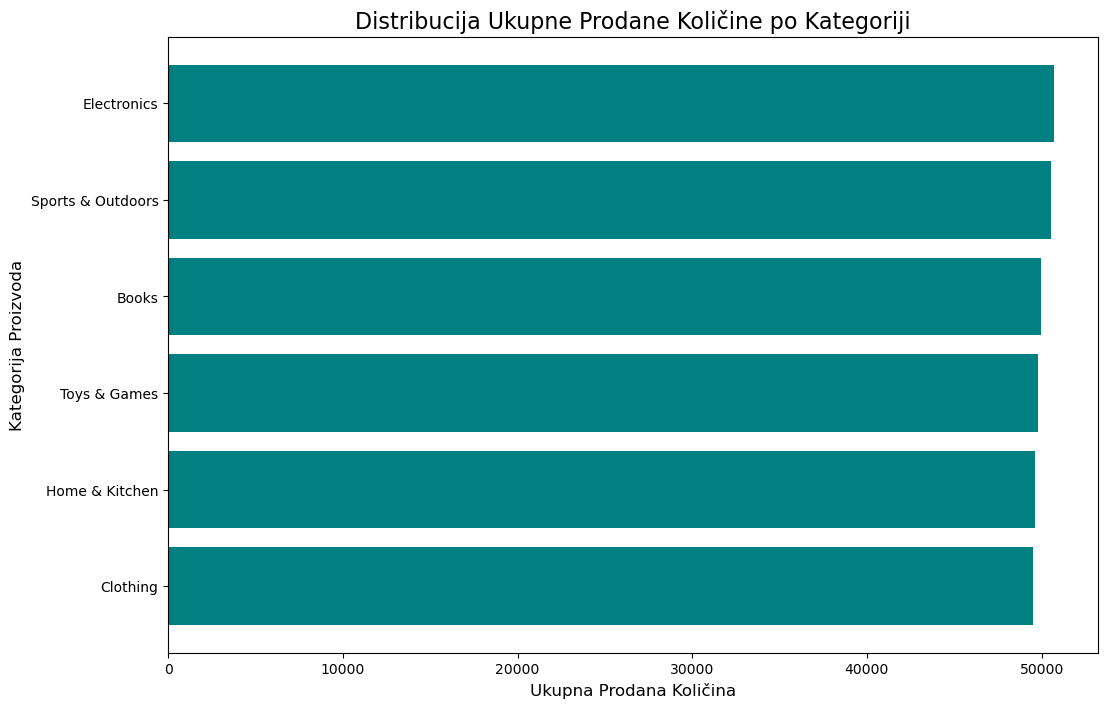

In [18]:
import matplotlib.pyplot as plt
# Pretpostavlja se da koristite "data" ili "data_cleaned" nakon čišćenja

# 1. Grupiranje po kategoriji i zbrajanje ukupne prodane količine (Quantity)
# sort_values(ascending=False) postavlja kategoriju s najviše prodanih komada na vrh
sales_distribution = data_cleaned.groupby("Category")["Quantity"].sum().sort_values(ascending=False)

# 2. Definiranje veličine grafa
plt.figure(figsize=(12, 8))

# 3. Kreiranje horizontalnog stupčastog grafa
# Y-os: Imena kategorija (index)
# X-os: Ukupna količina (values)
plt.barh(sales_distribution.index, sales_distribution.values, color='teal')

# 4. Postavljanje naslova i oznaka
plt.title("Distribucija Ukupne Prodane Količine po Kategoriji", fontsize=16)
plt.xlabel("Ukupna Prodana Količina", fontsize=12)
plt.ylabel("Kategorija Proizvoda", fontsize=12)

# 5. Osiguravanje da se kategorija s najvišom prodajom prikaže na vrhu grafa
plt.gca().invert_yaxis()

# 6. Prikaz grafa
plt.show()

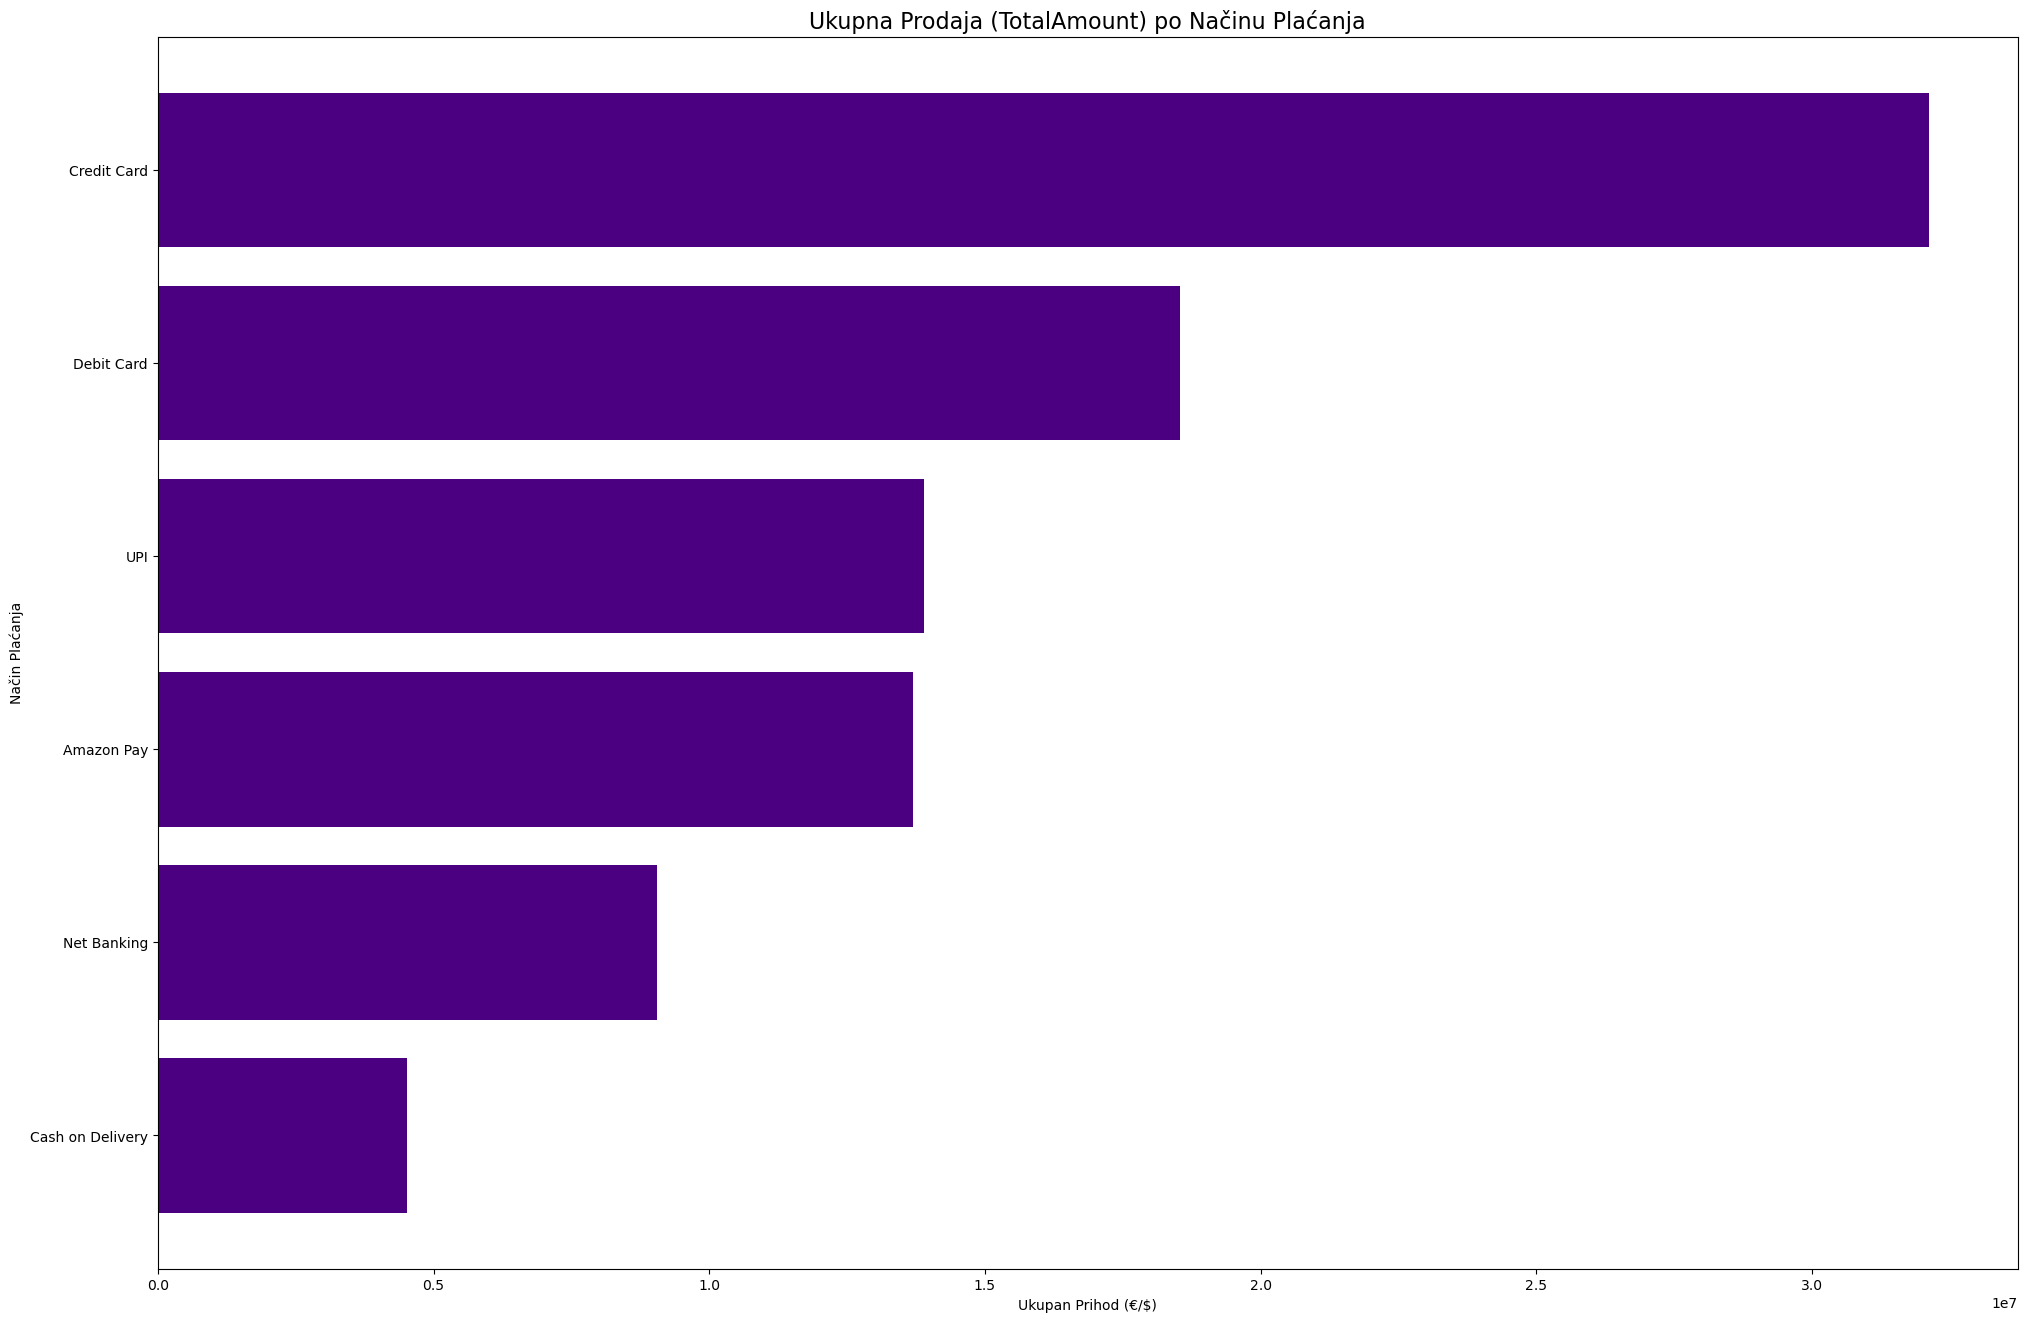

In [19]:
import matplotlib.pyplot as plt

# Analiza Prodaje (TotalAmount) po Načinu Plaćanja (PaymentMethod)
# 1. Grupiranje po PaymentMethod i zbrajanje ukupnog iznosa (TotalAmount)
payment_method_sales = data_cleaned.groupby("PaymentMethod")["TotalAmount"].sum().sort_values(ascending=False)

# 2. Definiranje veličine grafa
plt.figure(figsize=(24, 16))

# 3. Kreiranje horizontalnog stupčastog grafa
plt.barh(payment_method_sales.index, payment_method_sales.values, color='indigo')

# 4. Postavljanje naslova i oznaka
plt.title("Ukupna Prodaja (TotalAmount) po Načinu Plaćanja", fontsize=16)
plt.xlabel("Ukupan Prihod (€/$)")
plt.ylabel("Način Plaćanja")

# 5. Osiguravanje da način plaćanja s najvišom prodajom bude na vrhu
plt.gca().invert_yaxis()

# 6. Prikaz grafa
plt.show()

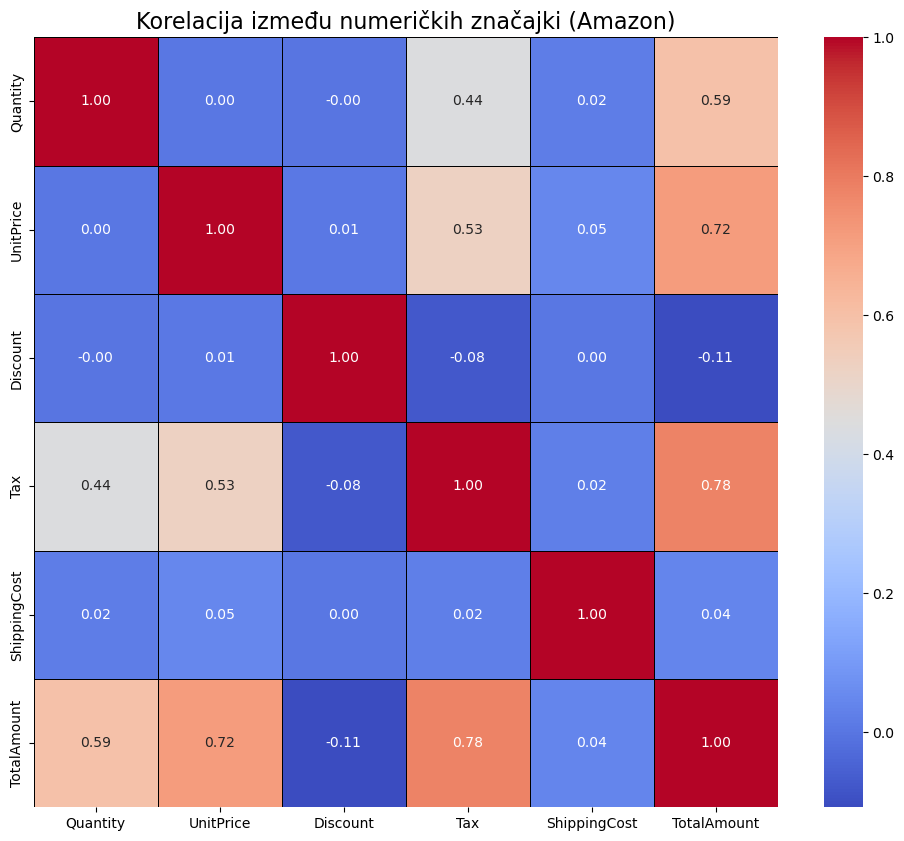

In [20]:
# 1. Odabir samo numeričkih stupaca
# Ovo je ključno jer se korelacija primjenjuje samo na numeričke podatke.
numeric_df = data_cleaned.select_dtypes(include=['float64', 'int64'])

# 2. Izračunavanje korelacijske matrice
# Matrica 'corr' sadrži koeficijente korelacije (između -1.0 i 1.0)
corr = numeric_df.corr()

# 3. Postavljanje veličine grafa
plt.figure(figsize=(12, 10))

# 4. Izrada Heatmap-e
# - annot=True: Prikazuje numeričke vrijednosti korelacije na grafu
# - fmt=".2f": Formatira te vrijednosti na dvije decimale
# - cmap="coolwarm": Koristi shemu boja gdje plava označava jaku negativnu korelaciju, a crvena jaku pozitivnu.
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, linecolor='black')

# 5. Postavljanje naslova
plt.title("Korelacija između numeričkih značajki (Amazon)", fontsize=16)

# 6. Prikaz grafa
plt.show()

R2 Score: 0.9095060550803177
MSE: 47135.17197623808


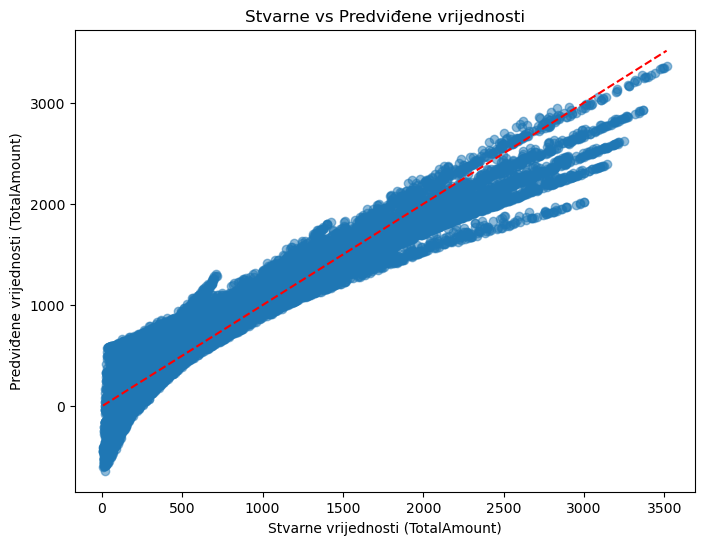

In [21]:
# MODEL 1: LINEARNA REGRESIJA
# Cilj: Predvidjeti TotalAmount na temelju ostalih numeričkih atributa

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ----------------------------------------------------
# 1. UČITAVANJE PODATAKA
# ----------------------------------------------------
df = data

# ----------------------------------------------------
# 2. ODABIR ATRIBUTA KOJI IMAJU SMISLA ZA REGRESIJU
# Koristimo samo numeričke vrijednosti koje utječu na iznos
# ----------------------------------------------------
features = [
    "Quantity",
    "UnitPrice",
    "Discount",
    "Tax",
    "ShippingCost"
]

X = df[features]
y = df["TotalAmount"]

# ----------------------------------------------------
# 3. PODJELA PODATAKA NA TRAIN/TEST
# ----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------------------------------
# 4. KREIRANJE I TRENING MODELA
# ----------------------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ----------------------------------------------------
# 5. TESTIRANJE MODELA
# ----------------------------------------------------
y_pred = model.predict(X_test)

# ----------------------------------------------------
# 6. OCJENE MODELA
# ----------------------------------------------------
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# ----------------------------------------------------
# 7. STVARNE VS PREDVIĐENE VRIJEDNOSTI (vizualizacija)
# ----------------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Stvarne vrijednosti (TotalAmount)")
plt.ylabel("Predviđene vrijednosti (TotalAmount)")
plt.title("Stvarne vs Predviđene vrijednosti")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # dijagonala savršene predikcije
plt.show()

# ----------------------------------------------------
# Model pogodi iznos narudžbe s oko 91% točnosti.
# Ponekad pogriješi za iznos koji u prosjeku stvori MSE ≈ 47k,
# mean squared error = prosječna kvadratna greška između stvarnih i predviđenih iznosa.

In [23]:
# MODEL 2:  RANDOM FOREST (KLASIFIKACIJA)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE #Balansiranjem klasa SMOTE-om, model više ne ignorira rijetke statuse.

# ---------- PODACI ----------
df = data

features = [
    "ProductID", "Category", "Brand", "Quantity", "UnitPrice",
    "Discount", "Tax", "ShippingCost", "PaymentMethod",
    "City", "State", "Country", "SellerID"
]
X = df[features]
y = df["OrderStatus"]

# ---------- IDENTIFIKACIJA TIPOVA ----------
categorical_cols = X.select_dtypes(include=["object"]).columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

X_processed = preprocess.fit_transform(X)

# ---------- BALANSIRANJE KLASA ----------
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

# ---------- PODJELA NA TRAIN/TEST ----------
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.25, random_state=42
)

# ---------- TRENING RANDOM FOREST ----------
model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
model.fit(X_train, y_train)

# ---------- PREDIKCIJA ----------
y_pred = model.predict(X_test)

# ---------- REZULTATI (kratko i pregledno) ----------
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Accuracy: {accuracy:.3f}")
print(f"Macro Precision: {precision:.3f}")
print(f"Macro Recall: {recall:.3f}")
print(f"Macro F1 Score: {f1:.3f}")

Accuracy: 0.662
Macro Precision: 0.700
Macro Recall: 0.663
Macro F1 Score: 0.626


In [24]:
# Accuracy = 0.662 → model pogodio točan OrderStatus u 66% slučajeva
# Macro Precision = 0.700 → 70% predviđanja po klasama je točno
# Macro Recall = 0.663 → model prepoznaje 66% stvarnih primjera svake klase
# Macro F1 Score = 0.626 → balans između precision i recall
# Zaključak: nakon SMOTE-a model prepoznaje i rijetke statuse, ali klasifikacija i dalje nije savršena

In [25]:
# MODEL 3: ASOCIJACIJSKA PRAVILA
# Cilj: Pronaći koje proizvode kupci najčešće kupuju zajedno
from itertools import combinations
from collections import Counter

df = data 
# Kreiramo listu svih proizvoda po narudžbi (CustomerName)
transactions = df.groupby('CustomerName')['ProductName'].apply(list)

# Generiramo sve parove proizvoda po narudžbi
pairs = []
for items in transactions:
    pairs += list(combinations(set(items), 2))  # set da izbjegnemo duplikate

# Brojimo koliko se koji par pojavljuje
pair_counts = Counter(pairs)

# Pretvaramo u DataFrame i sortiramo po učestalosti
pair_df = pd.DataFrame(pair_counts.items(), columns=['ProductPair', 'Count'])
pair_df = pair_df.sort_values('Count', ascending=False)

# Prikaz top 10 najčešćih parova
print("Top 10 najčešćih parova proizvoda:")
print(pair_df.head(10))


Top 10 najčešćih parova proizvoda:
                               ProductPair  Count
0       (Projector Mini, Wireless Charger)    200
804      (Wireless Earbuds, Action Camera)    200
801       (Wireless Earbuds, Water Bottle)    200
800     (Wireless Earbuds, Graphic Tablet)    200
799       (Wireless Earbuds, Kids Toy Car)    200
798  (Wireless Earbuds, Memory Card 128GB)    200
797       (Wireless Earbuds, Office Chair)    200
796         (Wireless Earbuds, Board Game)    200
795         (Wireless Earbuds, Sunglasses)    200
794         (Wireless Earbuds, Smartwatch)    200


Logistic Regression - AUC: 0.513
Random Forest - AUC: 0.502


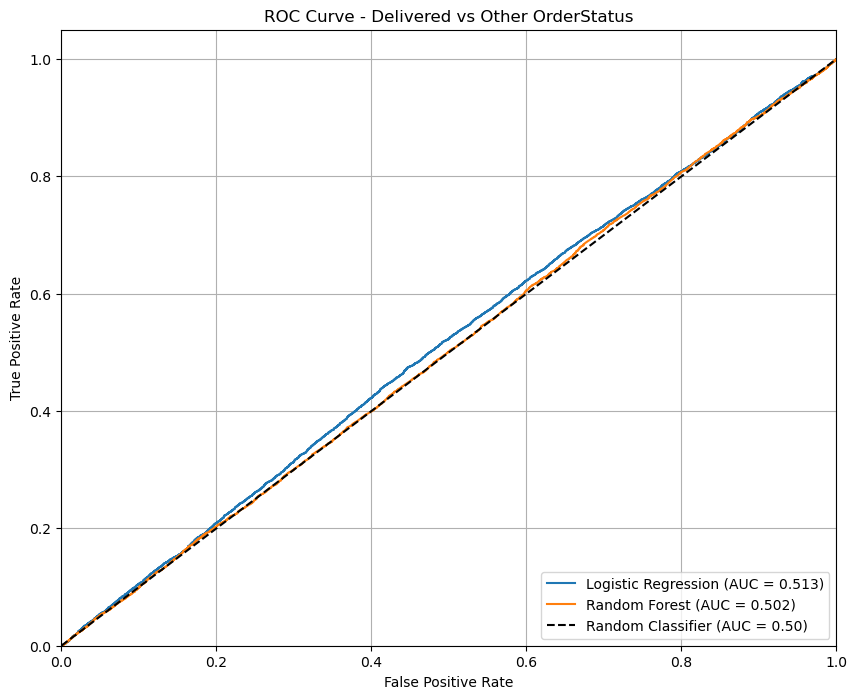

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings('ignore')  # Isključuje upozorenja

# ----------------------------------------------------
# 1. PRIPREMA PODATAKA
# ----------------------------------------------------
df = data  # tvoj DataFrame

# Kreiranje binarne ciljne varijable (1 = Delivered, 0 = ostali)
df['Is_Delivered'] = (df['OrderStatus'] == 'Delivered').astype(int)

# Značajke
NUMERIC_FEATURES = ['Quantity', 'UnitPrice', 'Discount', 'Tax', 'ShippingCost']
CATEGORICAL_FEATURES = ['Category', 'Brand', 'PaymentMethod', 'City', 'State', 'Country', 'SellerID']

X = df[NUMERIC_FEATURES + CATEGORICAL_FEATURES]
y = df['Is_Delivered']

# Preprocessing: StandardScaler za numeričke, OneHotEncoder za kategorijske
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), NUMERIC_FEATURES),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), CATEGORICAL_FEATURES)
    ]
)

X_processed = preprocess.fit_transform(X)

# Podjela podataka na trening i test
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.25, random_state=42, stratify=y
)

# ----------------------------------------------------
# 2. INICIJALIZACIJA MODELA
# ----------------------------------------------------
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=8)
}

# ----------------------------------------------------
# 3. ISCRTAVANJE ROC KRIVULJA
# ----------------------------------------------------
plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]  # vjerojatnost pozitivne klase (Delivered)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')
    print(f"{name} - AUC: {roc_auc:.3f}")

# Dijagonala slučajnog klasifikatora
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Delivered vs Other OrderStatus')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()